In [46]:
import pandas 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import preprocessing, svm, metrics, model_selection

In [80]:
df = pandas.read_excel('../data_sets/family_1_in_freezer/GH1_data_JS.xlsx', index_col='gene')
df = df.drop(['PDB', 'Sorting', 'Name', 'Sequence'], axis=1).dropna()
print(df.shape)
df.head()

(170, 12)


,Organism,Kindgom,Sol_exp_(mg/ml),Cellobiose_binary(Act),Cellobiose_therm_binary,pH7_40,pH4_40,pH7_60,pH7_80,pH4_80,pH7_80_pre80,pH7_90_pre90
gene,,,,,,,,,,,,
SDJGI_31,Picrophilus torridus DSM 9790,Archaea,0.010014,0.0,0.0,0.043767,0.042467,0.042100,0.040767,0.041400,0.04085,0.041333
SDJGI_139,Thermoplasma volcanium GSS1,Archaea,0.399383,1.0,1.0,1.111767,1.494767,1.898033,1.949733,1.498800,2.11665,0.045933
SDJGI_35,Magnaporthe grisea Y34,Eukaryote,0.012451,0.0,0.0,0.040667,0.040733,0.040500,0.040533,0.042033,0.04080,0.041333
SDJGI_137,Thermococcus kodakarensis KOD1,Archaea,0.004728,0.0,0.0,0.041167,0.041233,0.040867,0.041000,0.042533,0.04190,0.042100
SDJGI_42,Saccharophagus degradans 2-40,Bacteria,0.281507,1.0,0.0,1.795000,0.701667,1.006167,1.276900,0.511700,0.04050,0.041500


In [48]:
#! rsync -avz ca:/share/work/alex/bglb_family/pipeline/features.csv . 

/home/carlin/.bashrc: line 3: bind: warning: line editing not enabled
receiving file list ... done

sent 16 bytes  received 93 bytes  72.67 bytes/sec
total size is 854800  speedup is 7842.20


In [81]:
f = pandas.read_csv('features.csv', index_col='id')
df = df.join(f).dropna()
df.shape

(164, 73)

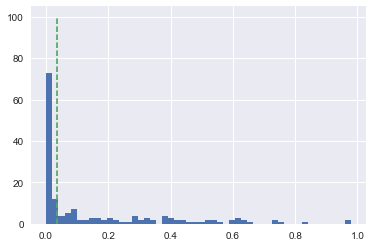

In [82]:
df['Sol_exp_(mg/ml)'].hist(bins=50).plot((0.035, 0.035), (0, 100), '--')

In [83]:
scaler = preprocessing.Binarizer(threshold=0.035)
df['expression'] = scaler.fit_transform(df[['Sol_exp_(mg/ml)']])
df.head()

,Organism,Kindgom,Sol_exp_(mg/ml),Cellobiose_binary(Act),Cellobiose_therm_binary,pH7_40,pH4_40,pH7_60,pH7_80,pH4_80,...,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_all_cst,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm,description,expression
SDJGI_1,Trifolium repens,Eukaryote,0.015022,0.0,0.0,0.039767,0.040133,0.039633,0.040033,0.041233,...,1.55,4.78,0.00,720.42,7.10,0.32,1.0,0.0,input_pose_0002,0.0
SDJGI_10,Zea mays,Eukaryote,0.008643,0.0,0.0,0.041333,0.041700,0.040933,0.041000,0.043533,...,-7.03,5.81,-1.24,0.25,-10.07,0.99,7.0,2.0,input_pose_0010,0.0
SDJGI_100,Exiguobacterium sp. AT1b,Bacteria,0.000675,0.0,0.0,0.040267,0.040633,0.040067,0.040400,0.041000,...,-3.01,5.73,-0.46,32.41,-2.02,0.95,3.0,2.0,input_pose_0005,0.0
SDJGI_101,Exiguobacterium sp. AT1b,Bacteria,0.012157,0.0,0.0,0.041100,0.041333,0.043167,0.040267,0.047300,...,-5.43,4.86,-0.94,0.15,-6.85,1.00,2.0,4.0,input_pose_0009,0.0
SDJGI_103,Thermotogales bacterium TBF 19.5.1,Bacteria,0.018201,0.0,0.0,0.040700,0.040533,0.040167,0.040467,0.040900,...,-7.77,2.82,-1.49,0.31,-11.54,0.94,4.0,1.0,input_pose_0006,0.0


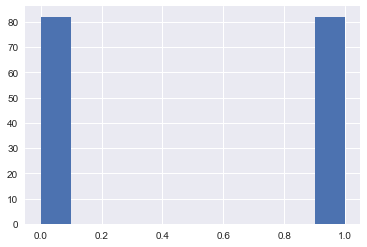

In [84]:
df.expression.hist()

In [85]:
features = [
    'total_score', 'fa_rep', 'hbond_sc',
    'all_cst', 'tot_pstat_pm', 'tot_nlpstat_pm', 'tot_burunsat_pm',
    'tot_hbond_pm', 'tot_NLconts_pm', 'tot_nlsurfaceE_pm',
    'tot_total_charge', 'tot_total_pos_charges', 'tot_total_neg_charges',
    'tot_seq_recovery', 'SR_1_total_score', 'SR_1_fa_rep',
    'SR_1_hbond_sc', 'SR_1_all_cst', 'SR_1_hbond_pm', 'SR_1_burunsat_pm',
    'SR_1_pstat_pm', 'SR_1_nlpstat_pm', 'SR_2_total_score',
    'SR_2_fa_rep', 'SR_2_hbond_sc', 'SR_2_all_cst', 'SR_2_hbond_pm',
    'SR_2_burunsat_pm', 'SR_2_pstat_pm', 'SR_2_nlpstat_pm', 
    'SR_3_total_score', 'SR_3_fa_rep', 'SR_3_hbond_sc', 'SR_3_all_cst',
    'SR_3_hbond_pm', 'SR_3_burunsat_pm', 'SR_3_pstat_pm', 'SR_3_nlpstat_pm',
    'SR_4_total_score', 'SR_4_fa_rep', 'SR_4_hbond_sc',
    'SR_4_all_cst', 'SR_4_hbond_pm', 'SR_4_burunsat_pm', 'SR_4_pstat_pm',
    'SR_4_nlpstat_pm', 'SR_5_total_score', 'SR_5_fa_rep',
    'SR_5_hbond_sc', 'SR_5_all_cst', 'SR_5_interf_E_1_2', 'SR_5_dsasa_1_2',
    'SR_5_hbond_pm', 'SR_5_burunsat_pm'
]

In [86]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df[features])
y = df['expression']

X.shape, y.shape

((164, 54), (164,))

/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


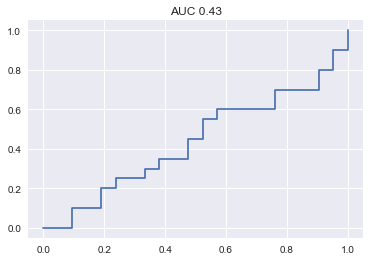

In [91]:
clf = svm.SVC(C=1, probability=1, class_weight='balanced', kernel='rbf')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
prob = clf.predict_proba(X_test) 
fpr, tpr, _ = metrics.roc_curve(y_test, prob[:, 1], pos_label=1) 
auc = metrics.roc_auc_score(y_test, prob[:, 1]) 
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.set_title('AUC {0:2.2}'.format(auc))
fig.show()